# DAY 7
Solution using NetworkX Directed Graphs

In [2]:
with open('input.txt') as infile:
    inputLines = [line.strip() for line in infile.readlines()]

In [3]:
import re
import networkx as nx

In [4]:
bagDirGraph = nx.DiGraph() # Directed Graph
outerRegex = r"(\w+\s\w+) bags contain (.*)$"
innerRegex = r"(\d+) (\w+\s\w+) bag"

In [5]:
for rule in inputLines:
    outerMatch = re.match(outerRegex,rule)
    if(outerMatch):
        outerColor = outerMatch.group(1)
        contents = outerMatch.group(2)
        for content in re.findall(innerRegex,contents):
            innerColor = content[1]
            quantity = content[0]
            bagDirGraph.add_edge(outerColor,innerColor, quant=int(quantity))

# Part 1
Since this is a directed graph, finding all the bags that can contain "shiny gold" bag is as simple as finding all the ancestors for the bag

In [6]:
ancestors = nx.ancestors(bagDirGraph,"shiny gold")
len(ancestors)

213

# Part 2
Similar to the JS solution using a stack to navigate the graph

In [7]:
bagsToCheck = [("shiny gold",1)]
totalCount = 0
while len(bagsToCheck) > 0:
    currBag, q = bagsToCheck.pop()
    successors = bagDirGraph[currBag].items()
    totalCount += q
    for successor,val in successors:
        bagsToCheck.append((successor, q * val["quant"]))

totalCount-1 # -1 because we don't want to count the shiny gold bag

38426

# Bonus - network graph

## Complete network

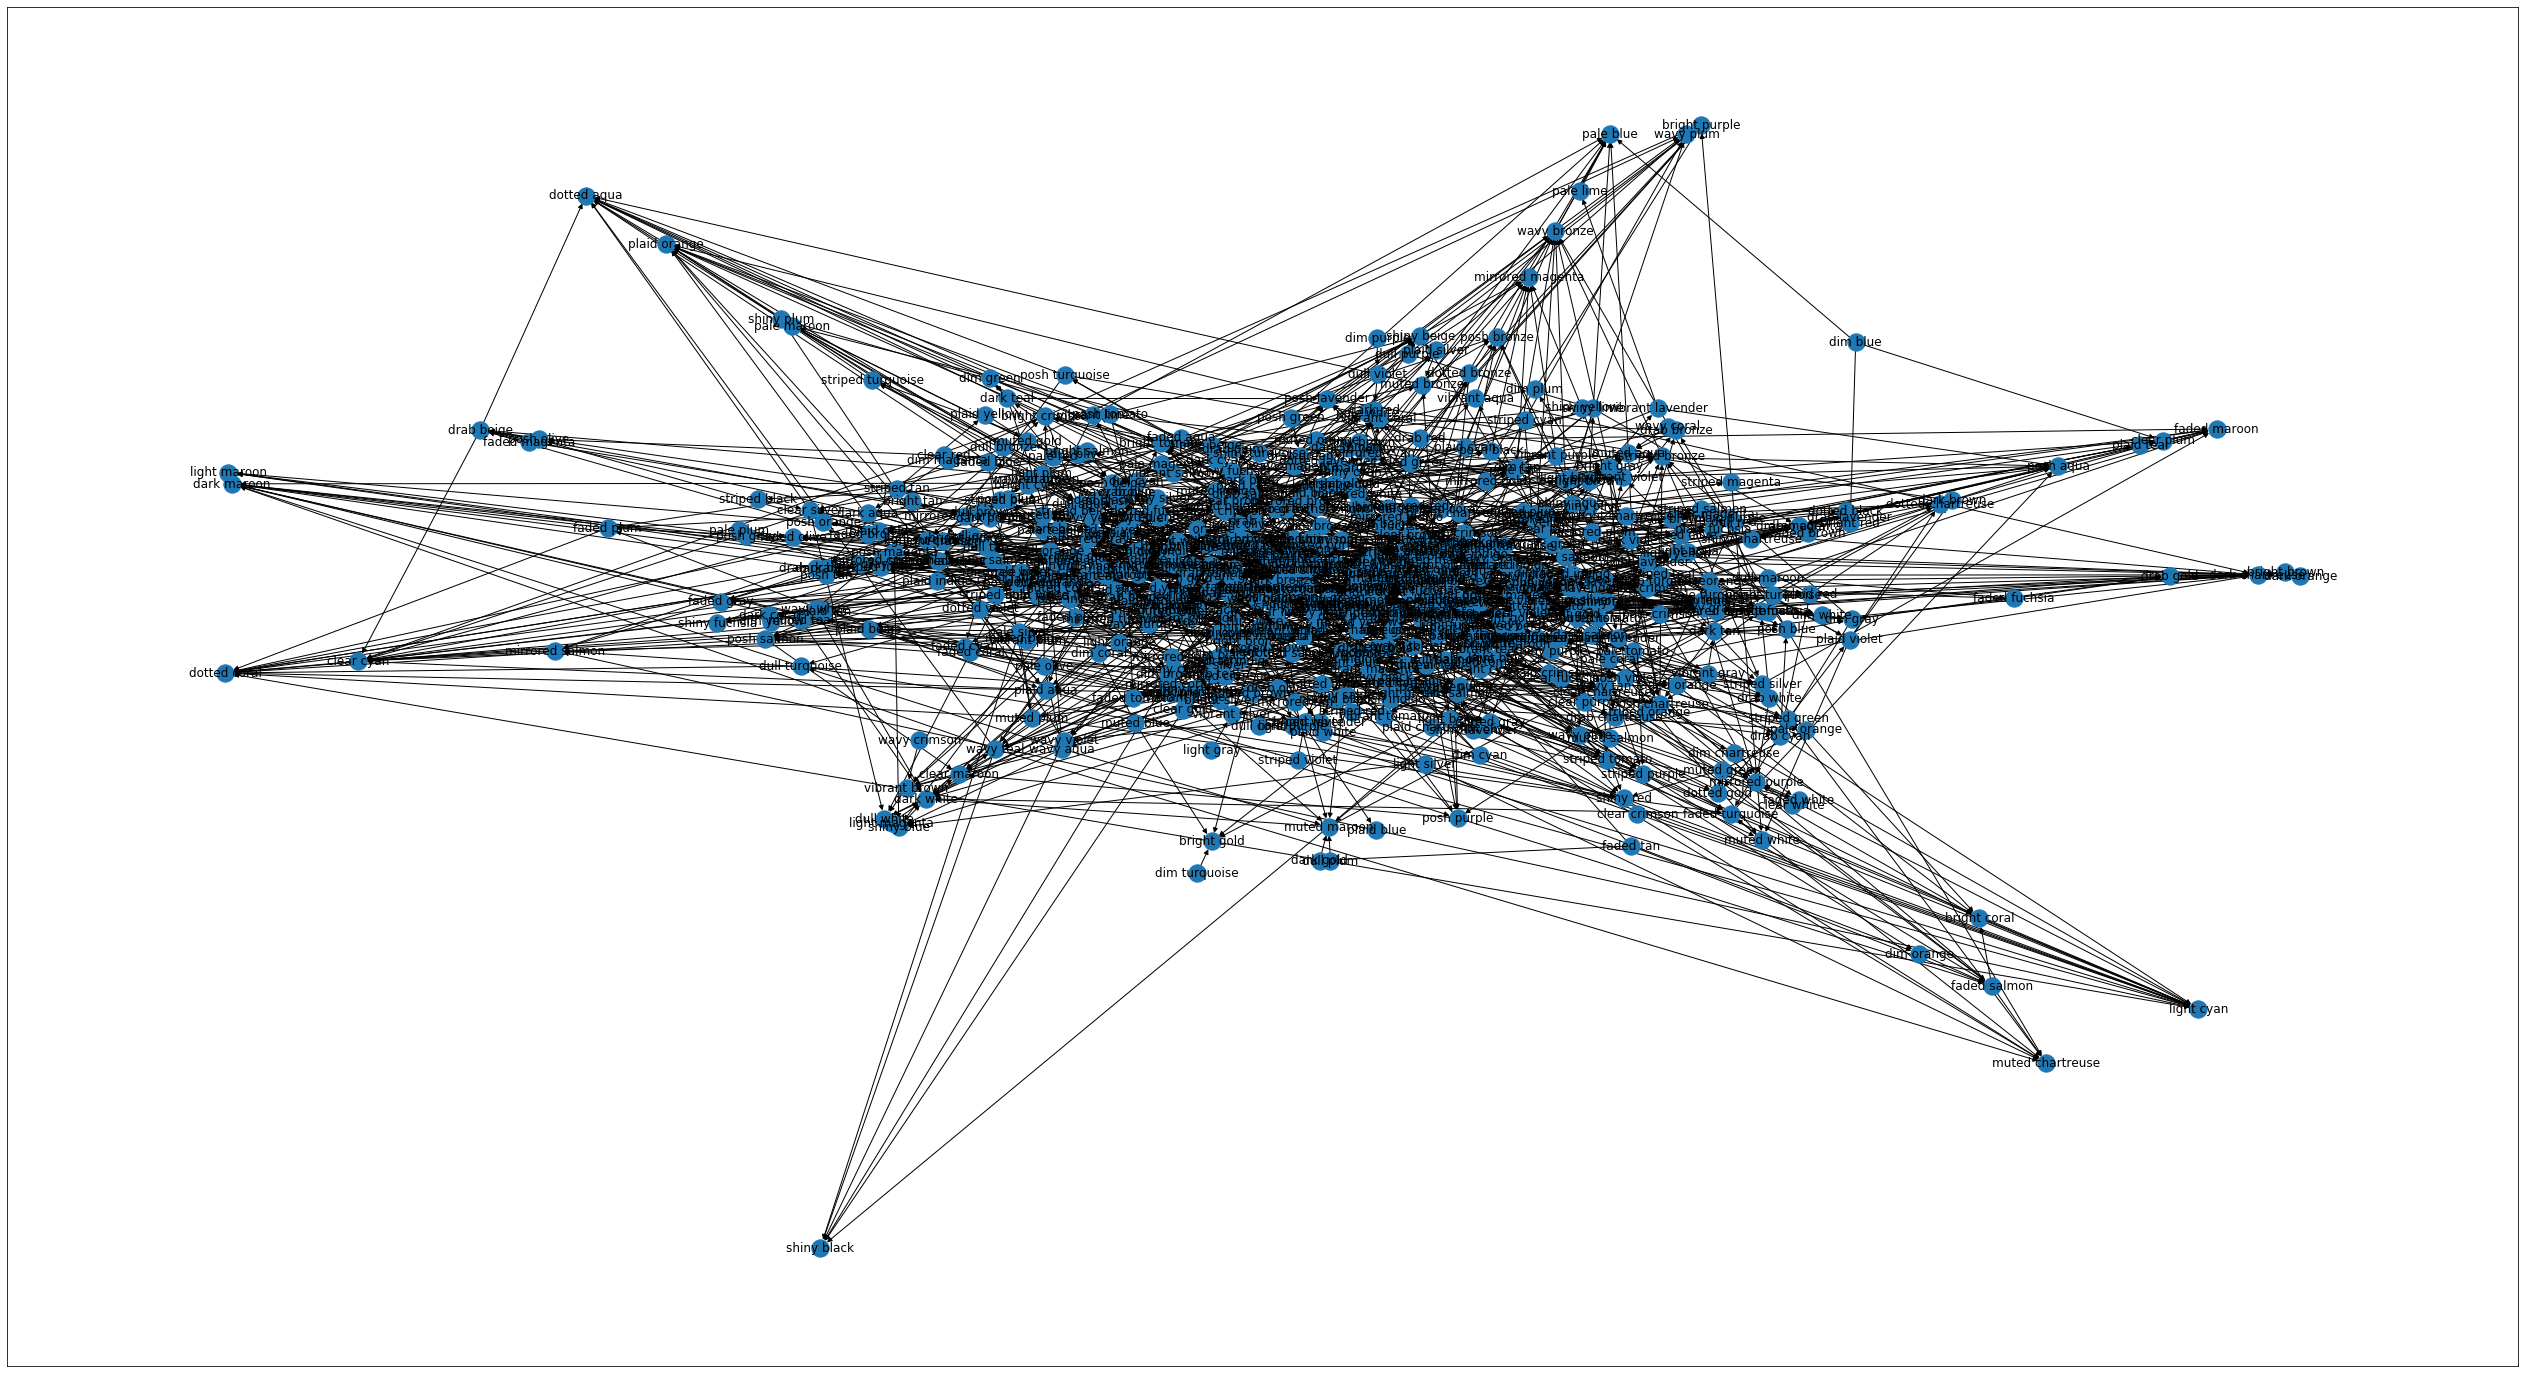

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(45,25))
nx.draw_networkx(bagDirGraph,weight="quant")
# nx.draw_networkx_labels(bagDirGraph,(1,1))
plt.show()

## Partial Network with only ancestors of "shiny gold"
visualization for part 1

In [9]:
def getSafeColorValue(bag):
    if(bag == "shiny gold"):
        return "#FFD500"
    color = bag.split(" ")[1]
    if color == "bronze":
        return "#CD7F32"
    return color

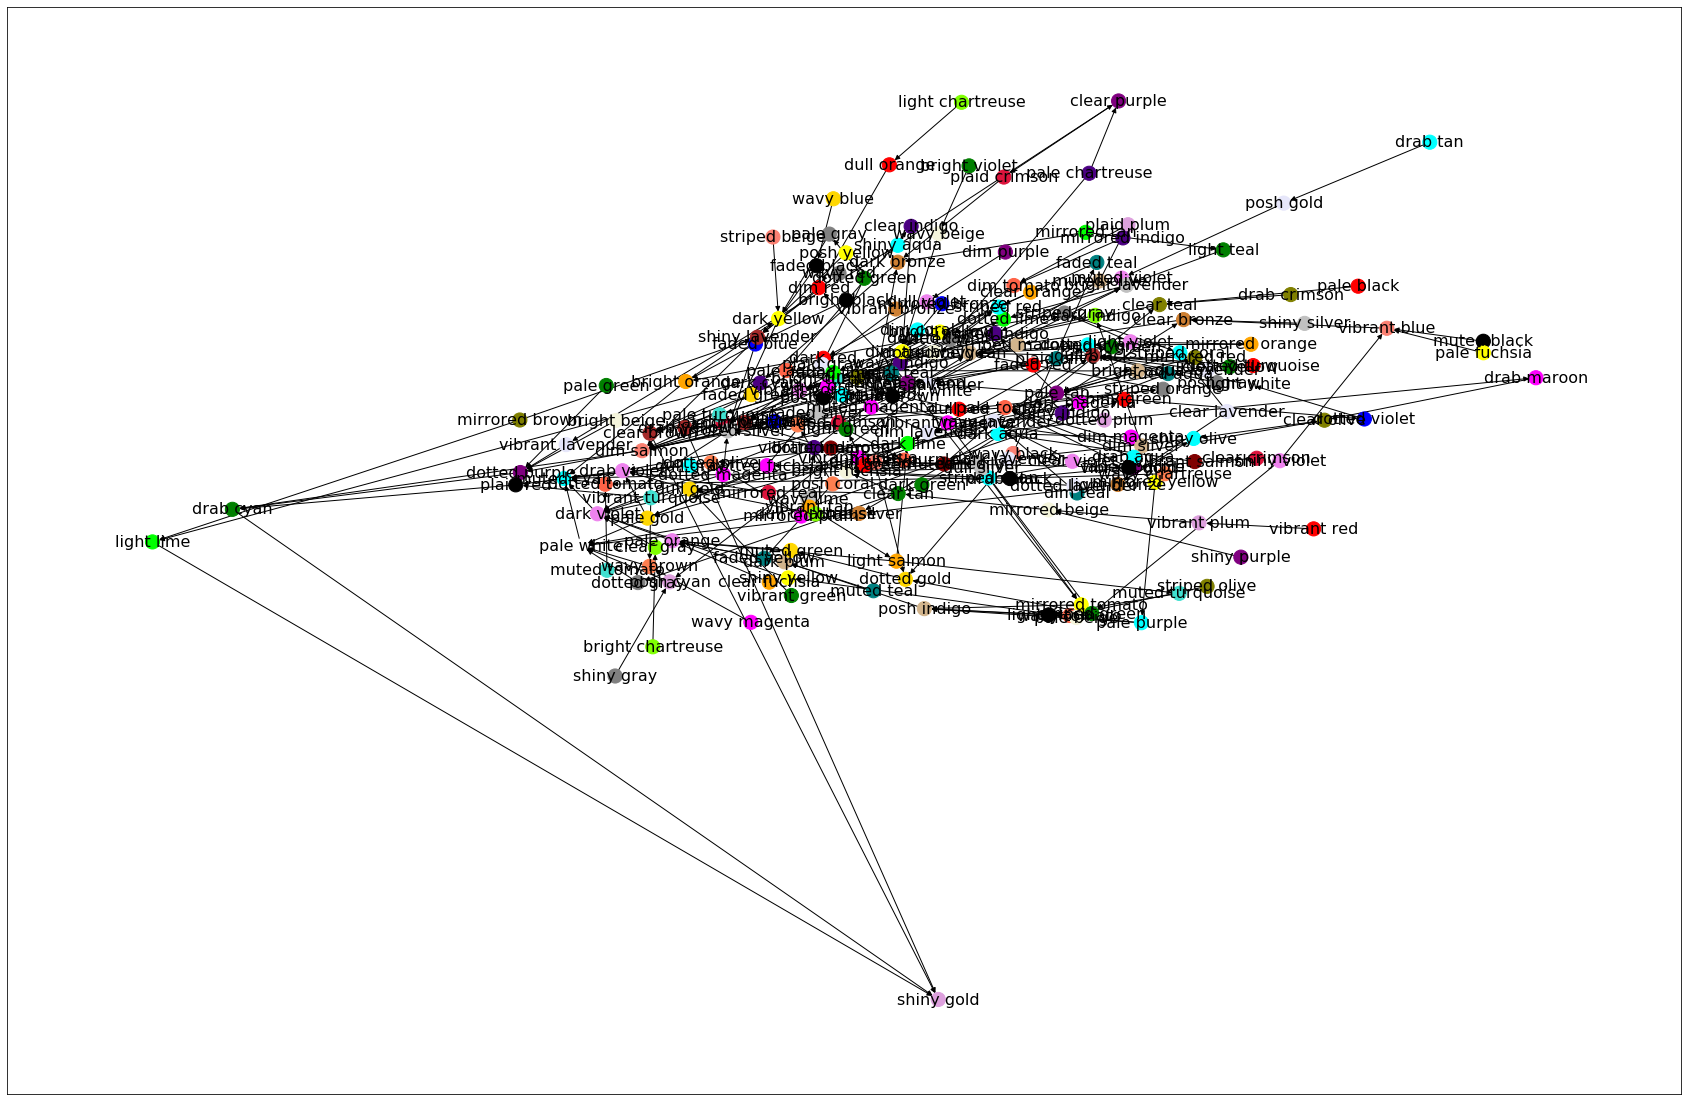

In [9]:
ancestors = [*nx.ancestors(bagDirGraph,"shiny gold"),"shiny gold"]
nodeColors = [getSafeColorValue(x) for x in ancestors]
subgraph = bagDirGraph.subgraph(ancestors)
positions = nx.spring_layout(subgraph,weight="quant")
# positions = nx.kamada_kawai_layout(subgraph, weight="quant")
positions["shiny gold"] =  (0,-1)
plt.figure(figsize=(30,20))
nx.draw_networkx(subgraph,node_color = nodeColors, node_size = 200, pos = positions,font_size=16)
plt.show()

## Partial network with only decendents of "shiny gold" 
This is a visualization for part 2

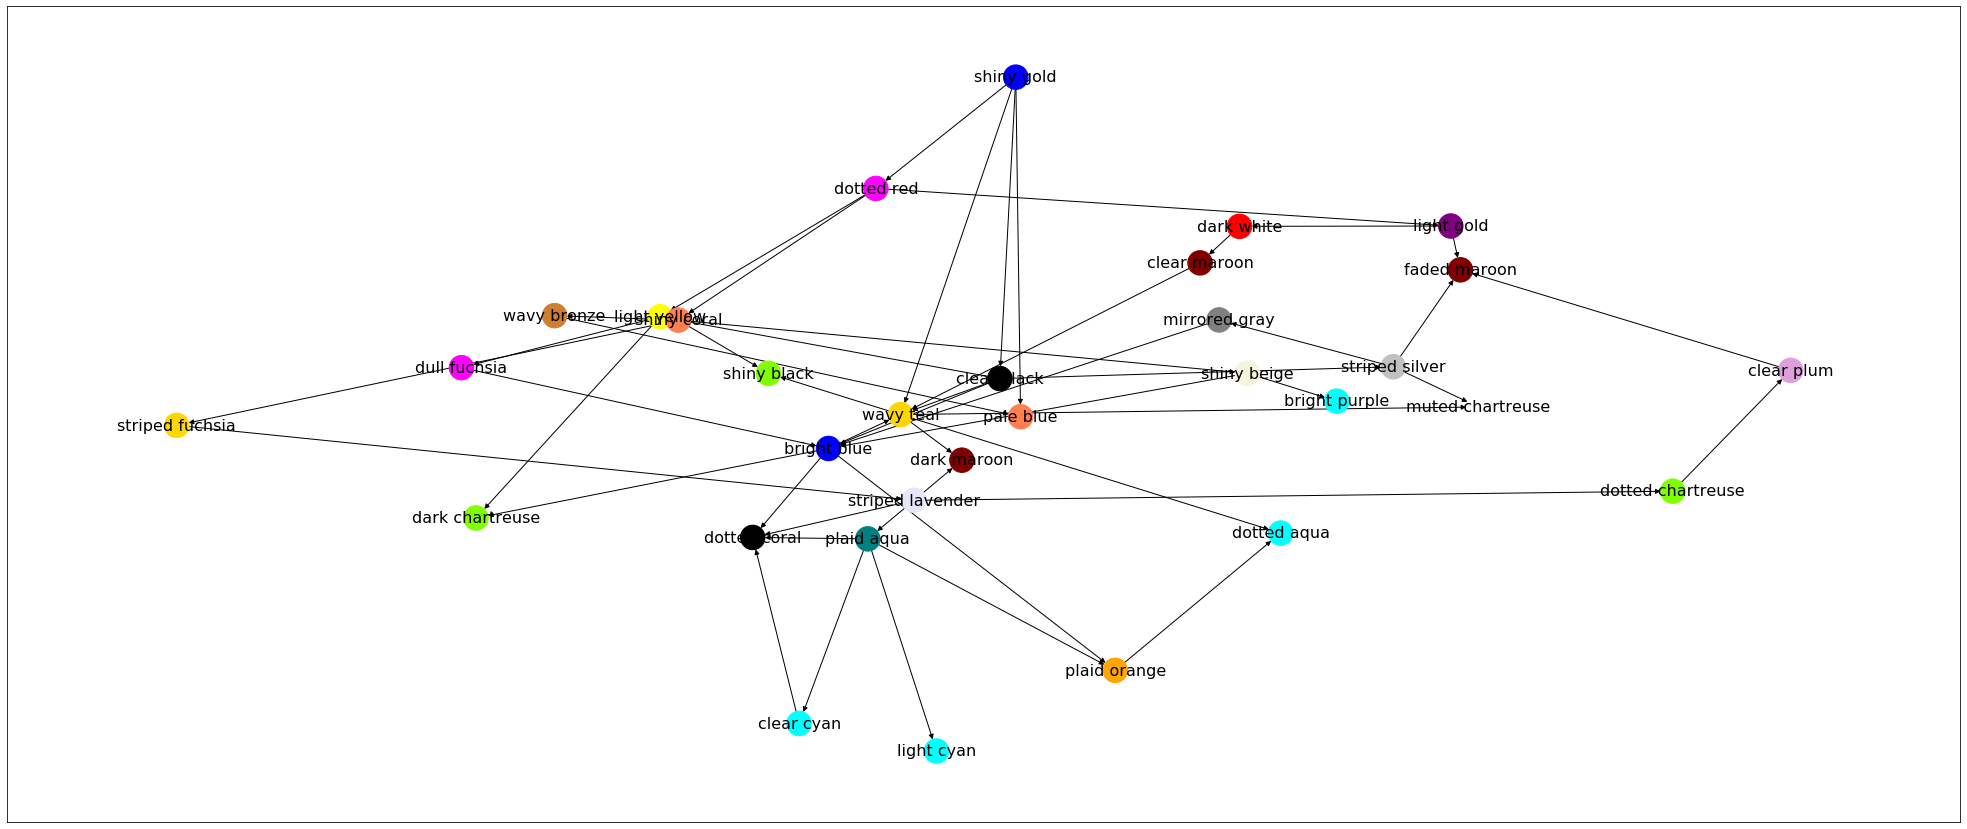

In [10]:

decendents = ["shiny gold",*nx.descendants(bagDirGraph,"shiny gold")]
nodeColors = [getSafeColorValue(x) for x in decendents]
subgraph = bagDirGraph.subgraph(decendents)
positions = nx.spring_layout(subgraph)
positions = nx.kamada_kawai_layout(subgraph, weight="quant",pos=positions)
positions["shiny gold"] =  (0,1)
plt.figure(figsize=(35,15))
nx.draw_networkx(subgraph,node_color = nodeColors, node_size = 600, pos = positions,font_size=16)
plt.show()

# nx.shell_layout(subgraph)